In [1]:
import pandas as pd
import numpy as np 
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seed = 42
np.random.seed(seed)

sns.set_style("whitegrid")
sns.set_palette("colorblind")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})


### Read The dataset

In [17]:
# install first xldr with pip install xlrd
def load_data(path):
    path_dir = os.path.dirname(os.path.abspath(__name__))
    file = os.path.join(path_dir, path)

    df = pd.read_excel(file)
    return df

In [24]:
df = load_data("superstore.xls")

In [47]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

we will drop row ID first

In [44]:
df.drop(["Row ID"], axis=1, inplace=True)

In [45]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

we can see if there is no missing value in the dataset and also duplicate data

In [16]:
df.duplicated().sum() 

0

In [42]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,9994.0,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order Date,9994,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,9994,2016-05-03 23:06:58.571142912,2014-01-07 00:00:00,2015-05-27 00:00:00,2016-06-29 00:00:00,2017-05-18 00:00:00,2018-01-05 00:00:00,NaN
Postal Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108


we can see if there is some skewness in the data

### Exploratory Data Analysis

#### treating outliers

In [50]:
df["Category"].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [51]:
os = df.query("Category == 'Office Supplies'")

In [60]:
os['Order Date'] = pd.to_datetime(os['Order Date'])

/var/folders/b9/rpbdtb191bd5fhsqy8l2j8g00000gp/T/ipykernel_11313/1133627327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  os['Order Date'] = pd.to_datetime(os['Order Date'])


In [61]:
os["Order Date"].min(), os["Order Date"].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

<Axes: xlabel='Order Date'>

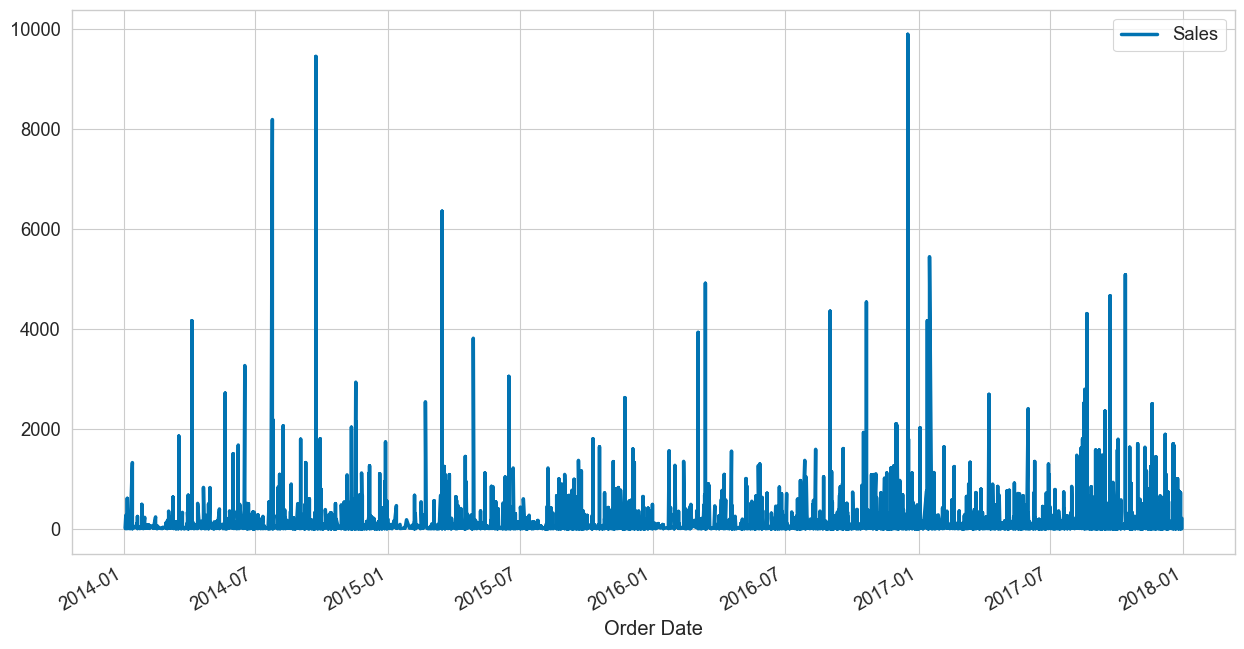

In [62]:
os[['Order Date', 'Sales']].set_index('Order Date').plot.line(figsize=(15, 8))

<Axes: xlabel='Order Date', ylabel='Sales'>

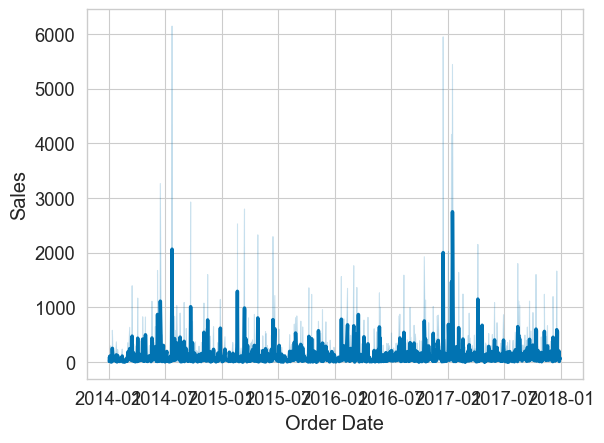

In [64]:
sns.lineplot(x="Order Date", y="Sales", data=os)

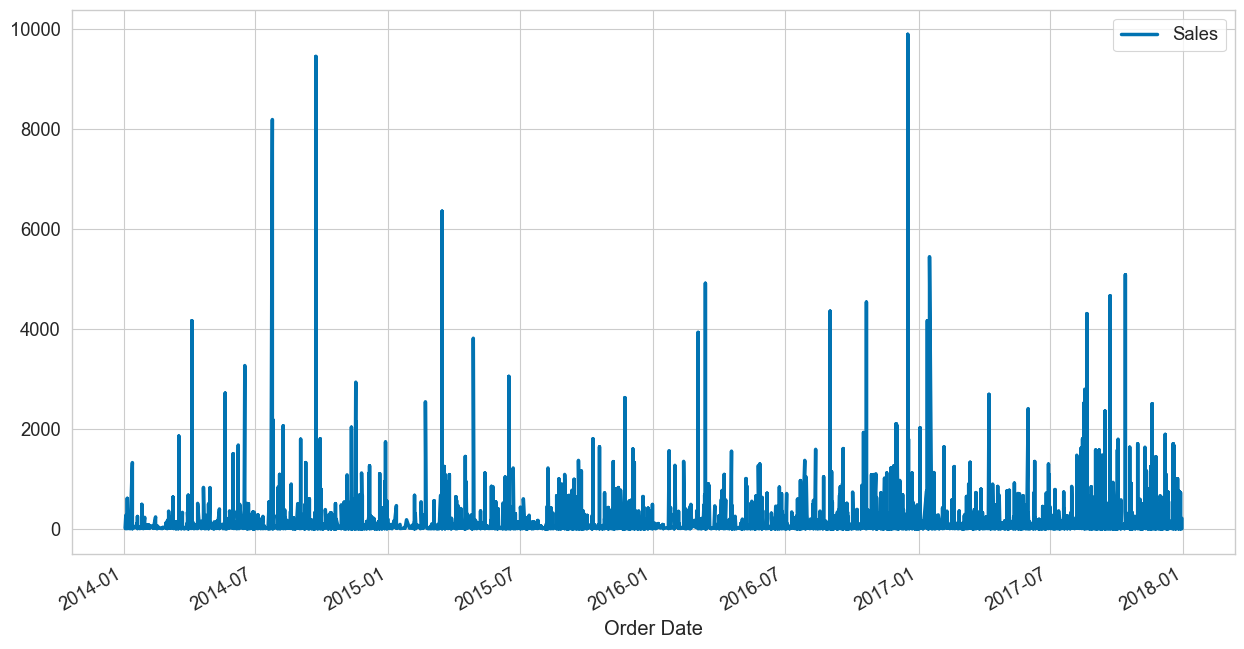

In [63]:
os.plot.line(x="Order Date", y="Sales", figsize=(15, 8))
plt.show()